### 음원(노래 등) 벡터화하기

In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# 음원 벡터화

def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    features = np.mean(mfccs, axis=1)
    return features

#### 코드에 사용된 음원은 제공하지 않습니다. ####
audio_file1 = "오르트구름_윤하(Younha_ユンナ)_320k.mp3"
audio_file2 = "사건의 지평선_윤하(Younha_ユンナ)_320k.mp3"
#### 코드에 사용된 음원은 제공하지 않습니다. ####

feature_vector1 = extract_features(audio_file1)
feature_vector2 = extract_features(audio_file2)

# print(f"{audio_file1}:", feature_vector1)
# print(f"{audio_file2}:", feature_vector2)

similarity = np.dot(feature_vector1, feature_vector2) / (np.linalg.norm(feature_vector1) * np.linalg.norm(feature_vector2))
print(f"Similarity: {similarity}")

오르트구름_윤하(Younha_ユンナ)_320k.mp3: [-22.963694   72.56524     2.6007826  23.118412    7.017455   11.622183
   6.8263574   3.3252625   2.5628066   5.701409   -3.877181    4.239012
  -2.795169 ]
사건의 지평선_윤하(Younha_ユンナ)_320k.mp3: [-24.140394    85.87596     -6.767971    21.488611     8.107774
   2.9455771    5.7402225   -0.68909496   0.905748     0.47506538
  -6.45154     -1.80813     -5.089687  ]
Similarity: 0.9794670343399048


In [14]:
# 멜 스펙트로그램

def extract_mel_spectrogram(file_path):
    # 오디오 파일 로드
    y, sr = librosa.load(file_path)

    # 멜 스펙트로그램 특징 추출
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # 특징을 평균 내어 벡터화
    features = np.mean(mel_spectrogram, axis=1)

    return features

# 두 음원 파일 경로
audio_file1 = "오르트구름_윤하(Younha_ユンナ)_320k.mp3"
audio_file2 = "사건의 지평선_윤하(Younha_ユンナ)_320k.mp3"

# 각 음원의 멜 스펙트로그램 벡터 추출
feature_vector1 = extract_mel_spectrogram(audio_file1)
feature_vector2 = extract_mel_spectrogram(audio_file2)

# print(f"Feature vector for {audio_file1}:", feature_vector1)
# print(f"Feature vector for {audio_file2}:", feature_vector2)

similarity = np.dot(feature_vector1, feature_vector2) / (np.linalg.norm(feature_vector1) * np.linalg.norm(feature_vector2))
print(f"Similarity: {similarity}")


Similarity: 0.9056249856948853


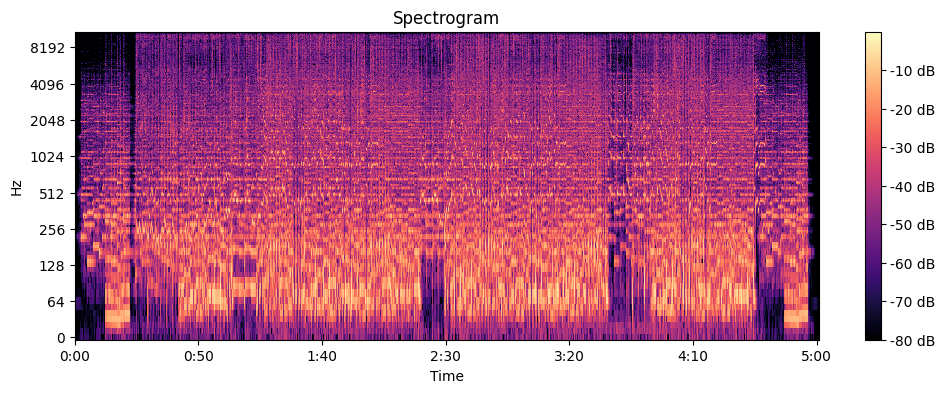

In [15]:
# 푸리에변환
import librosa.display
import matplotlib.pyplot as plt

# 음원 파일 경로
audio_file = "사건의 지평선_윤하(Younha_ユンナ)_320k.mp3"

# 오디오 파일 로드
y, sr = librosa.load(audio_file)

# 푸리에 변환
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# 결과 그래프 그리기
plt.figure(figsize=(12, 4))

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [16]:
# 푸리에 변환 비교

from scipy.spatial.distance import cosine

def extract_features(file_path, target_length=124025):
    y, sr = librosa.load(file_path, sr=None)  # 샘플링 레이트를 유지하기 위해 sr=None으로 설정

    # 길이를 target_length로 맞추기
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))
    elif len(y) > target_length:
        y = y[:target_length]

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    return D.flatten()

# 두 음원 파일 경로
audio_file1 = "사건의 지평선_윤하(Younha_ユンナ)_320k.mp3"
audio_file2 = "오르트구름_윤하(Younha_ユンナ)_320k.mp3"

# 특징 벡터 추출
feature_vector1 = extract_features(audio_file1)
feature_vector2 = extract_features(audio_file2)

# 유사도 계산
similarity = 1 - cosine(feature_vector1, feature_vector2)
print(f"Similarity: {similarity}")


Similarity: 0.9874935746192932
